In [1]:
import json 

In [2]:
DIR_PATH = "/Users/given/projects/sound-symbolism/results/logit_lens"

# field
WORD_GROUP = "constructed"
IS_CORRECT = "is_correct"
PROBS = "probs"
LOGITS = "logits"

# input type
ORIGINAL = "original"
AUDIO = "audio"
IPA = "ipa"
ORIGINAL_AND_AUDIO = "original_and_audio"
IPA_AND_AUDIO = "ipa_and_audio"

In [3]:
def load_logit_lens_file(input_type):
    file_path = f"{DIR_PATH}/{input_type}_{WORD_GROUP}.json"
    with open(file_path, 'r') as file:
        logit_lens_results = json.load(file)
    
    return logit_lens_results

In [4]:
original_file = load_logit_lens_file(ORIGINAL)
ipa_file = load_logit_lens_file(IPA)
audio_file = load_logit_lens_file(AUDIO)
original_and_audio_file = load_logit_lens_file(ORIGINAL_AND_AUDIO)
ipa_and_audio_file = load_logit_lens_file(IPA_AND_AUDIO)


print(len(original_file))
print(len(ipa_file))
print(len(audio_file))
print(len(original_and_audio_file))
print(len(ipa_and_audio_file))

18474
19594
19518
15921
16517


In [5]:
original_file

{'art_lee-lay_abrupt-continuous': {'0': {'choice': {'logit': [1.8984375,
     1.28125],
    'prob': [1.0132789611816406e-05, 5.453824996948242e-06]},
   'top': {'logit': 11.0,
    'prob': 0.0908203125,
    'token_idx': 97408,
    'word': '-strokes'}},
  '1': {'choice': {'logit': [1.5234375, 0.4453125],
    'prob': [9.47713851928711e-06, 3.2335519790649414e-06]},
   'top': {'logit': 11.3125,
    'prob': 0.1689453125,
    'token_idx': 97408,
    'word': '-strokes'}},
  '2': {'choice': {'logit': [0.4296875, -0.431640625],
    'prob': [1.564621925354004e-06, 6.631016731262207e-07]},
   'top': {'logit': 12.875,
    'prob': 0.3984375,
    'token_idx': 97408,
    'word': '-strokes'}},
  '3': {'choice': {'logit': [-2.546875, -3.09375],
    'prob': [5.9138983488082886e-08, 3.4226104617118835e-08]},
   'top': {'logit': 11.9375,
    'prob': 0.11572265625,
    'token_idx': 97408,
    'word': '-strokes'}},
  '4': {'choice': {'logit': [-3.421875, -3.453125],
    'prob': [1.6298145055770874e-08, 1.58

In [6]:
# intersection keys for all 
intersection_keys = list(
    set(original_file.keys()) & set(ipa_file.keys()) & set(audio_file.keys()) & set(original_and_audio_file.keys()) 
    & set(ipa_and_audio_file.keys())
)
len(intersection_keys)

13534

In [7]:
def format_results(logit_lens_results, keys):
    out = {}
    
    for key in keys:
        is_correct = None
        probs = []
        logits = []
        for layer_id, v in logit_lens_results[key].items():
            if isinstance(v, bool): 
                is_correct = v
            else:
                probs.append(v["choice"]["prob"])
                logits.append(v["choice"]["logit"])
        
            out[key] = {
                IS_CORRECT: is_correct,
                PROBS: probs,
                LOGITS: logits
            }
    
    return out
    

In [33]:
import numpy as np
import matplotlib.pyplot as plt


def plot_probs_by_key(total_results, key, input_type, field=PROBS,log_scale=False):
    result = total_results[key]
    
    is_correct = result[IS_CORRECT]
    value = result[field]
    
    lang, word, dim = key.split("_")
    title = f"({field}) {word} ({lang})  : {input_type} : {is_correct}"
    
    data = np.array(value)
    y1 = data[:, 0]
    y2 = data[:, 1]
    x = np.arange(len(y1))
    
    # Pick colors for each curve
    color1 = 'red'
    color2 = 'blue'
    
    plt.figure(figsize=(5, 2))
    
    # Plot curves
    plt.plot(x, y1, label=f'{dim.split("-")[0]}', color=color1)
    plt.plot(x, y2, label=f'{dim.split("-")[1]}', color=color2)
    # plt.ylim(0, 1.00)
    
    # Max point for y1
    max_idx_y1 = np.argmax(y1)
    max_val_y1 = y1[max_idx_y1]
    plt.scatter(max_idx_y1, max_val_y1, color=color1, s=100, zorder=5)
    plt.text(max_idx_y1, max_val_y1, f"{max_val_y1:.3g}",
             color=color1, fontsize=10, ha='left', va='bottom')
    
    # Max point for y2
    max_idx_y2 = np.argmax(y2)
    max_val_y2 = y2[max_idx_y2]
    plt.scatter(max_idx_y2, max_val_y2, color=color2, s=100, zorder=5)
    plt.text(max_idx_y2, max_val_y2, f"{max_val_y2:.3g}",
             color=color2, fontsize=10, ha='left', va='bottom')
    
    # Last point of y1
    last_x1 = x[-1]
    last_y1 = y1[-1]
    plt.scatter(last_x1, last_y1, color=color1, marker='^', s=100, zorder=5)
    plt.text(last_x1, last_y1, f"{last_y1:.3g}",
             color=color1, fontsize=10, ha='left', va='bottom')
    
    # Last point of y2
    last_x2 = x[-1]
    last_y2 = y2[-1]
    plt.scatter(last_x2, last_y2, color=color2, marker='^', s=100, zorder=5)
    plt.text(last_x2, last_y2, f"{last_y2:.3g}",
             color=color2, fontsize=10, ha='left', va='bottom')
    
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    if log_scale:
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

In [9]:
original_results = format_results(original_file, intersection_keys)
audio_results = format_results(audio_file, intersection_keys)
original_and_audio_results = format_results(original_and_audio_file, intersection_keys)
ipa_results = format_results(ipa_file, intersection_keys)
ipa_and_audio_results = format_results(ipa_and_audio_file, intersection_keys)

print(len(original_results))
print(len(audio_results))
print(len(original_and_audio_results))
print(len(ipa_results))
print(len(ipa_and_audio_results))


13534
13534
13534
13534
13534


In [10]:
words = []
for key in intersection_keys:
    lang, word, dim = key.split("_")

    is_correct_original = original_results[key][IS_CORRECT]
    is_correct_audio = audio_results[key][IS_CORRECT]
    is_correct_original_and_audio = original_and_audio_results[key][IS_CORRECT]
    
    
    words.append({
        "key": key,
        "word": word,
        "dim": dim,
        "lang": lang,
        ORIGINAL : is_correct_original,
        AUDIO : is_correct_audio,
        ORIGINAL_AND_AUDIO : is_correct_original_and_audio,
        "logits" : {
            ORIGINAL : original_file[key],
            AUDIO: audio_file[key],
            IPA: ipa_file[key],
            ORIGINAL_AND_AUDIO : original_and_audio_file[key],
            IPA_AND_AUDIO : ipa_and_audio_file[key],
        }
    })


In [11]:
import pandas as pd


df = pd.DataFrame(words)
df.head()

key     word                 dim lang  original  \
0          art_bay-dah_big-small  bay-dah           big-small  art      True   
1  art_go-pah_masculine-feminine   go-pah  masculine-feminine  art      True   
2     art_shah-mo_beautiful-ugly  shah-mo      beautiful-ugly  art      True   
3        art_dah-gay_heavy-light  dah-gay         heavy-light  art      True   
4    art_zay-zah_delicate-rugged  zay-zah     delicate-rugged  art      True   

   audio  original_and_audio  \
0   True                True   
1   True                True   
2   True                True   
3   True                True   
4   True                True   

                                              logits  
0  {'original': {'0': {'choice': {'logit': [2.031...  
1  {'original': {'0': {'choice': {'logit': [1.921...  
2  {'original': {'0': {'choice': {'logit': [1.898...  
3  {'original': {'0': {'choice': {'logit': [2.015...  
4  {'original': {'0': {'choice': {'logit': [2.015...

In [12]:
i = 0

In [13]:
dim_list = list(df["dim"].unique())
dim_list

['big-small',
 'masculine-feminine',
 'beautiful-ugly',
 'heavy-light',
 'delicate-rugged',
 'simple-complex',
 'happy-sad',
 'abrupt-continuous',
 'fast-slow',
 'strong-weak',
 'solid-nonsolid',
 'inhibited-free',
 'exciting-calming',
 'sharp-round',
 'hard-soft',
 'realistic-fantastical',
 'harsh-mellow',
 'ordinary-unique',
 'passive-active',
 'tense-relaxed',
 'dangerous-safe']

In [14]:
sem_dim = dim_list[4]
print(sem_dim)


def get_keys_by_dim(dim):
    return df[df["dim"] == dim].key.tolist()


keys_sem_dim = get_keys_by_dim(sem_dim)
print(keys_sem_dim)

delicate-rugged
['art_zay-zah_delicate-rugged', 'art_say-lay_delicate-rugged', 'art_lee-lah_delicate-rugged', 'art_zo-vee_delicate-rugged', 'art_they-zah_delicate-rugged', 'art_may-say_delicate-rugged', 'art_mah-sho_delicate-rugged', 'art_nee-sho_delicate-rugged', 'art_vay-tay_delicate-rugged', 'art_pah-they_delicate-rugged', 'art_kah-zay_delicate-rugged', 'art_vay-kah_delicate-rugged', 'art_pah-vah_delicate-rugged', 'art_bee-no_delicate-rugged', 'art_vah-though_delicate-rugged', 'art_day-lay_delicate-rugged', 'art_mah-doe_delicate-rugged', 'art_shay-mo_delicate-rugged', 'art_mo-shee_delicate-rugged', 'art_lo-shay_delicate-rugged', 'art_kee-toe_delicate-rugged', 'art_see-lah_delicate-rugged', 'art_lay-gay_delicate-rugged', 'art_day-mo_delicate-rugged', 'art_no-mah_delicate-rugged', 'art_mo-gay_delicate-rugged', 'art_vee-tah_delicate-rugged', 'art_shay-nay_delicate-rugged', 'art_pay-though_delicate-rugged', 'art_teethey_delicate-rugged', 'art_lee-shee_delicate-rugged', 'art_fo-mah_delic

In [15]:
original_results[key].keys()

dict_keys(['is_correct', 'probs', 'logits'])

index: 18
key: art_mo-shee_delicate-rugged


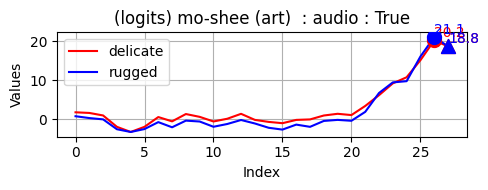

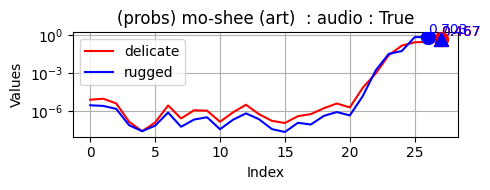

In [ ]:
i += 1; key = keys_sem_dim[i]

print(f"index: {i}")
print(f"key: {key}")

option = LOGITS
log_scale = False
# plot_probs_by_key(original_results, key, ORIGINAL, option, log_scale)
plot_probs_by_key(audio_results, key, AUDIO, option, log_scale)

option = PROBS
log_scale = True
# plot_probs_by_key(original_results, key, ORIGINAL, option, log_scale)
plot_probs_by_key(audio_results, key, AUDIO, option, log_scale)

# plot_probs_by_key(original_and_audio_results, key, ORIGINAL_AND_AUDIO, option, log_scale)
햐# plot_probs_by_key(ipa_results, key, IPA, option, log_scale)
# plot_probs_by_key(ipa_and_audio_results, key, IPA_AND_AUDIO, option, log_scale)

In [17]:
len(df)

13534

In [18]:
# df.to_csv('logit_lens_data.csv', index=False)

In [19]:
print(df['dim'].value_counts())



dim
simple-complex           1509
happy-sad                1332
masculine-feminine       1307
big-small                1295
fast-slow                1244
heavy-light               947
delicate-rugged           898
solid-nonsolid            795
abrupt-continuous         698
dangerous-safe            488
hard-soft                 458
beautiful-ugly            444
realistic-fantastical     436
sharp-round               423
harsh-mellow              331
exciting-calming          254
passive-active            242
strong-weak               123
ordinary-unique           121
inhibited-free            118
tense-relaxed              71
Name: count, dtype: int64


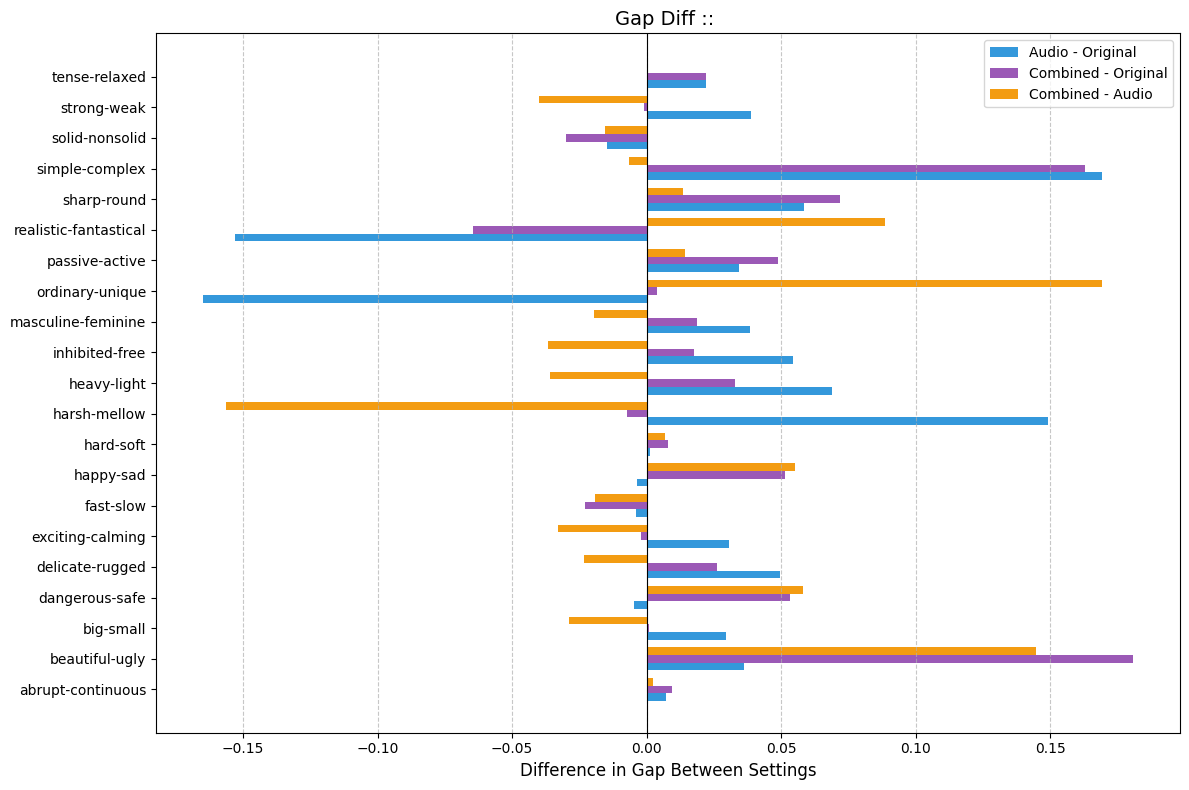

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


def analyze_semantic_dimension_gaps(df):
    def _calculate_choice_gap(logits):
        """Calculate the absolute gap between two choice probabilities in the final layer."""
        final_layer = max(int(k) for k in logits if k.isdigit())
        probs = logits[str(final_layer)]["choice"]["prob"]
        return abs(probs[0] - probs[1])

    def _initialize_dim_result():
        """Return an initialized result dictionary for a semantic dimension."""
        return {
            'original': [],
            'audio': [],
            'original_and_audio': [],
            'correct_original': 0,
            'correct_audio': 0,
            'correct_original_and_audio': 0,
            'count': 0
        }

    def _update_dim_result(result, row):
        """Update a semantic dimension result entry based on a row of data."""
        result['original'].append(_calculate_choice_gap(row['logits']['original']))
        result['audio'].append(_calculate_choice_gap(row['logits']['audio']))
        result['original_and_audio'].append(_calculate_choice_gap(row['logits']['original_and_audio']))
        result['correct_original'] += int(row['original'])
        result['correct_audio'] += int(row['audio'])
        result['correct_original_and_audio'] += int(row['original_and_audio'])
        result['count'] += 1
        
    def _finalize_dim_statistics(results):
        for dim, val in results.items():
            val['avg_original'] = np.mean(val['original'])
            val['avg_audio'] = np.mean(val['audio'])
            val['avg_original_and_audio'] = np.mean(val['original_and_audio'])
            val['acc_original'] = val['correct_original'] / val['count']
            val['acc_audio'] = val['correct_audio'] / val['count']
            val['acc_original_and_audio'] = val['correct_original_and_audio'] / val['count']

    
    results = defaultdict(_initialize_dim_result)
    for dim, group in df.groupby('dim'):
        for _, row in group.iterrows():
            _update_dim_result(results[dim], row)
    _finalize_dim_statistics(results)
    
    return results


def plot_semantic_dimension_gaps(results, top_n=15):
    df = pd.DataFrame([
        {
            'dim': dim,
            'original': val['avg_original'],
            'audio': val['avg_audio'],
            'original_and_audio': val['avg_original_and_audio'],
            'acc_original': val['acc_original'],
            'acc_audio': val['acc_audio'],
            'acc_original_and_audio': val['acc_original_and_audio'],
            'count': val['count'],
            'avg_gap': np.mean([val['avg_original'], val['avg_audio'], val['avg_original_and_audio']])
        }
        for dim, val in results.items()
    ])
    # df = df.sort_values('avg_gap', ascending=False).head(top_n)

    fig, ax = plt.subplots(figsize=(12, max(8, len(df) * 0.4)))
    width = 0.25
    x = np.arange(len(df))
    colors = ['#3498db', '#e74c3c', '#2ecc71']

    bars = [
        ax.barh(x - width, df['original'], width, label='Original', color=colors[0], alpha=0.8),
        ax.barh(x, df['audio'], width, label='Audio', color=colors[1], alpha=0.8),
        ax.barh(x + width, df['original_and_audio'], width, label='Original+Audio', color=colors[2], alpha=0.8)
    ]

    for i in range(len(df)):
        for j, bar in enumerate([bars[0], bars[1], 
                                 bars[2]]):
            acc_key = ['acc_original', 'acc_audio', 'acc_original_and_audio'][j]
            acc = df.iloc[i][acc_key]
            width = bar[i].get_width()
            x_text = width + 0.01 if width > 0.05 else width + 0.02  # 더 크게 띄움
            ha = 'left' if width > 0.05 else 'right'  # 짧은 경우 오른쪽 정렬
            ax.text(x_text, bar[i].get_y() + bar[i].get_height()/2, f"{acc:.2f}",
                    va='center', ha=ha, fontsize=8, color='black')  # 컬러 고정

    ax.set_xlabel('Average Gap Between Semantic Dimension Choices', fontsize=12)
    ax.set_yticks(x)
    ax.set_yticklabels(df['dim'], fontsize=10)
    ax.set_title('Semantic Dimension Gaps Across Settings', fontsize=14)
    ax.legend()
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


def plot_semantic_dimension_gap_differences(results, top_n=15, lang=""):
    df = pd.DataFrame([
        {
            'dim': dim,
            'audio_vs_original': val['avg_audio'] - val['avg_original'],
            'combined_vs_original': val['avg_original_and_audio'] - val['avg_original'],
            'combined_vs_audio': val['avg_original_and_audio'] - val['avg_audio'],
            'avg_gap': np.mean([val['avg_original'], val['avg_audio'], val['avg_original_and_audio']]),
            'count': val['count']
        }
        for dim, val in results.items()
    ])
    df['abs_audio_vs_original'] = df['audio_vs_original'].abs()
    # df = df.sort_values('abs_audio_vs_original', ascending=False).head(top_n)

    fig, ax = plt.subplots(figsize=(12, min(8, len(df) * 0.4)))
    width = 0.25
    x = np.arange(len(df))
    colors = ['#3498db', '#9b59b6', '#f39c12']

    ax.barh(x - width, df['audio_vs_original'], width, label='Audio - Original', color=colors[0])
    ax.barh(x, df['combined_vs_original'], width, label='Combined - Original', color=colors[1])
    ax.barh(x + width, df['combined_vs_audio'], width, label='Combined - Audio', color=colors[2])

    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax.set_xlabel('Difference in Gap Between Settings', fontsize=12)
    ax.set_yticks(x)
    ax.set_yticklabels(df['dim'], fontsize=10)
    ax.set_title(f'Gap Diff :: {lang.upper()}', fontsize=14)
    ax.legend()
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Example usage:
top_n = 25
result = analyze_semantic_dimension_gaps(df)
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n)

In [21]:
top_n = 25
result = analyze_semantic_dimension_gaps(df[df['lang'] == 'ko'])
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n, lang='ko')

KeyError: 'audio_vs_original'

In [ ]:
top_n = 25
result = analyze_semantic_dimension_gaps(df[df['lang'] == 'ja'])
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n, lang='ja')

In [ ]:
top_n = 25
result = analyze_semantic_dimension_gaps(df[df['lang'] == 'en'])
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n, lang="en")

In [ ]:
top_n = 25
result = analyze_semantic_dimension_gaps(df[df['lang'] == 'fr'])
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n, lang='fr')